# Portfolio assignment 16
**Train a decision tree to predict one of the categorical columns of your own dataset(pokemon.csv):**

Prepare the data, Some machine learning algorithms can not handle missing values. You will either need to:
- replace missing values (with the mean or most popular value). (You can use *.fillna(\<value\>)*)
- remove rows with missing data. (with *.dropna()*)

After:
- Split the dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.

---

- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
- Which depth and features did you add per cycle?

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

pokemon = pd.read_csv('pokemon.csv')
pokemon_clean = pokemon.dropna()

In [6]:
# Doel: Legendary
# Kenmerken: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = pokemon_clean[features]
y = pokemon_clean['Legendary']

In [7]:
# Verdeel(70%), (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [9]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {acc_train:.2f}")
print(f"Test Accuracy: {acc_test:.2f}")

Train Accuracy: 0.99
Test Accuracy: 0.93


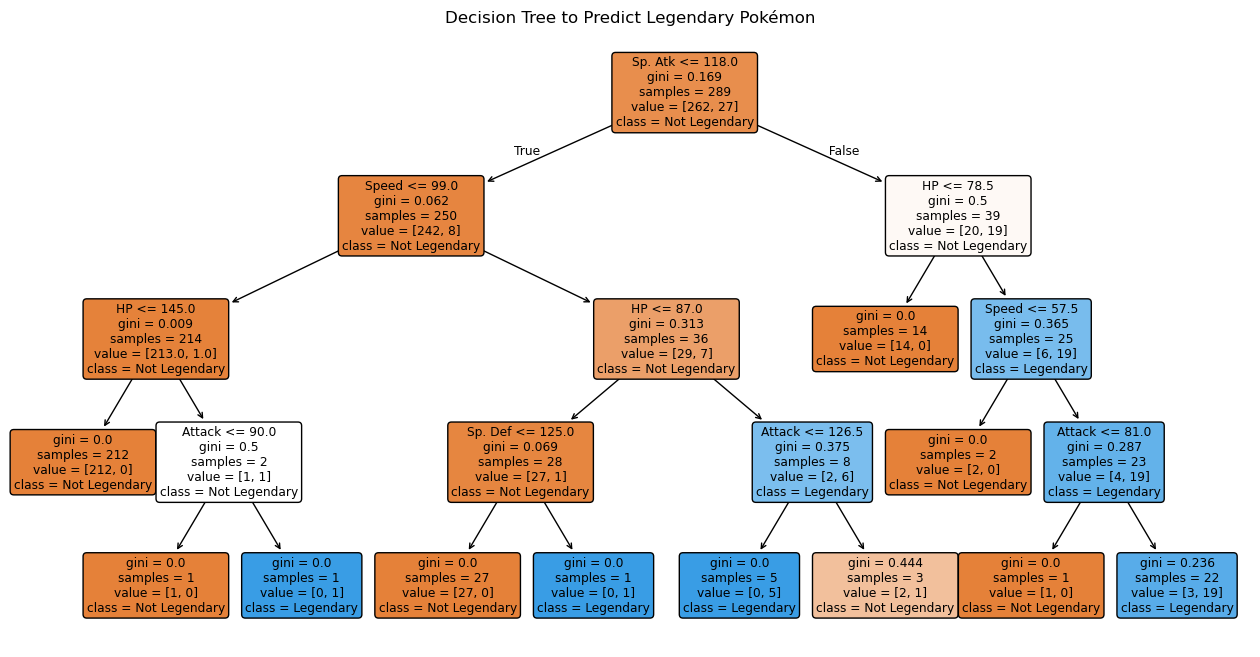

In [10]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=features, class_names=["Not Legendary", "Legendary"], filled=True, rounded=True)
plt.title("Decision Tree to Predict Legendary Pokémon")
plt.show()

### Findings:
- De decision tree voorspelt of een Pokémon Legendary is met een **hoge nauwkeurigheid**:
Train accuracy: *99%*, Test accuracy: *93%*, dus een **goede fit**.

- *Attack* en *Sp. Atk* zijn **sterke kenmerken** voor voorspelling.

- Trainingsset was iets nauwkeuriger dan de testset. dit komt omdat het model de trainigsdata al "kent" (lichte overfitting is normaal).

- De tree heeft een diepte van 4.

- Per niveau wordt gesplitst op sterkte van de Pokémon-stats (bijvoorbeeld: Attack ≥ 134).

